In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [156]:
df = df.select_dtypes(include=['number'])

In [157]:
df

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


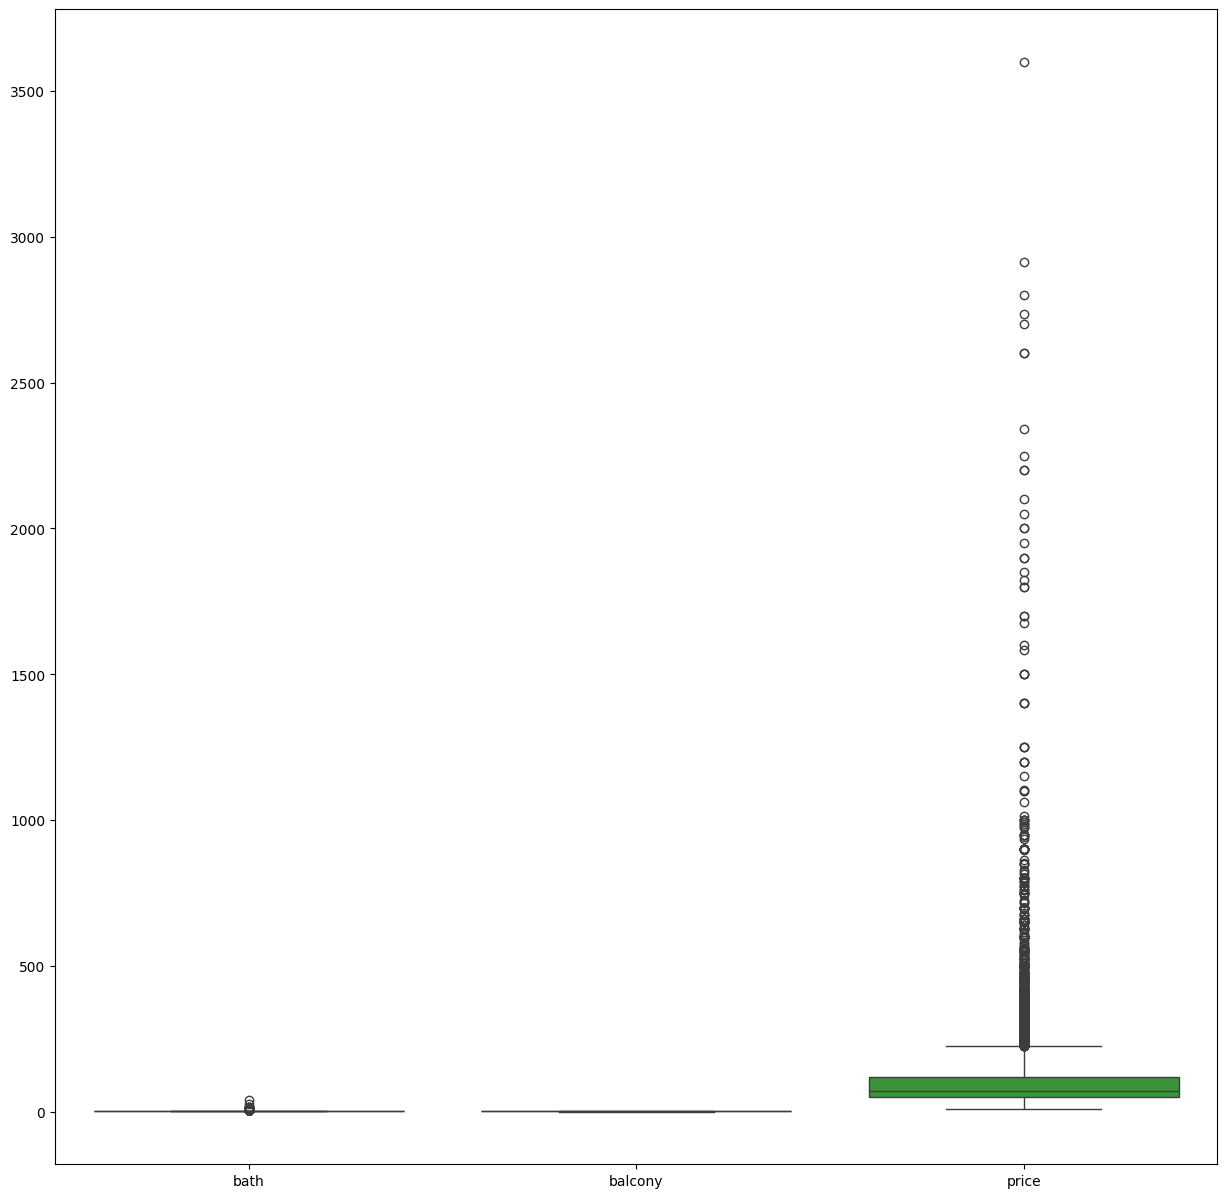

In [158]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=df,ax=ax)
plt.savefig("boxplotames.jpg")

In [159]:
df.duplicated().sum()

8730

In [160]:
df1=df[df.duplicated(keep=False)]

In [161]:
df1.corr()

,bath,balcony,price
bath,1.000000,0.283416,0.599071
balcony,0.283416,1.000000,0.178120
price,0.599071,0.178120,1.000000


In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10332 entries, 1 to 13319
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bath     10330 non-null  float64
 1   balcony  10056 non-null  float64
 2   price    10332 non-null  float64
dtypes: float64(3)
memory usage: 322.9 KB


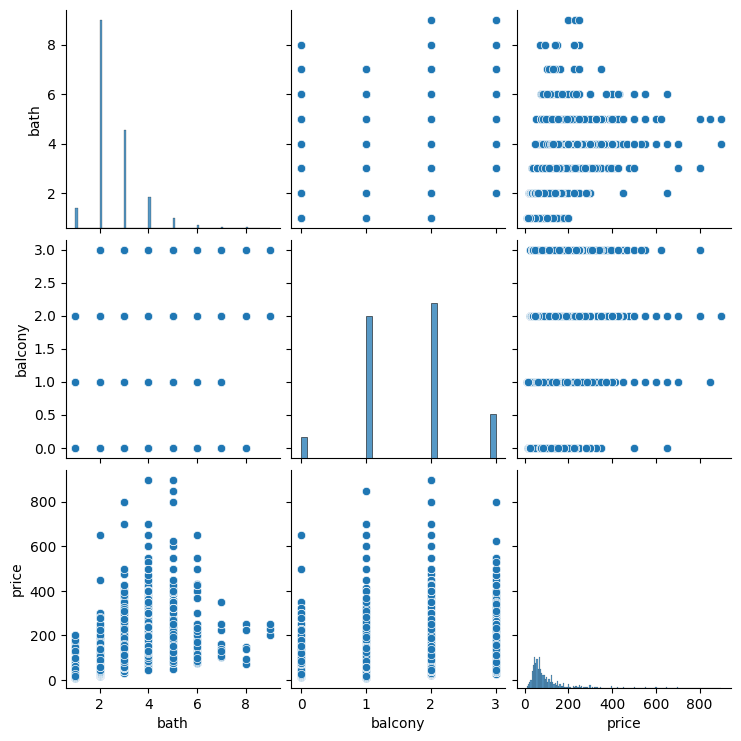

In [163]:
sns.pairplot(df1)

In [164]:
df1.isnull().sum()

bath         2
balcony    276
price        0
dtype: int64

In [165]:
mean_value=df1['bath'].mean()
df1['bath'].fillna(mean_value,inplace=True)
mean_value=df1['balcony'].mean()
df1['balcony'].fillna(mean_value,inplace=True)

C:\Users\R S computer\AppData\Local\Temp\ipykernel_10136\3320478334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bath'].fillna(mean_value,inplace=True)
C:\Users\R S computer\AppData\Local\Temp\ipykernel_10136\3320478334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['balcony'].fillna(mean_value,inplace=True)


In [166]:
df1.isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

<Axes: >

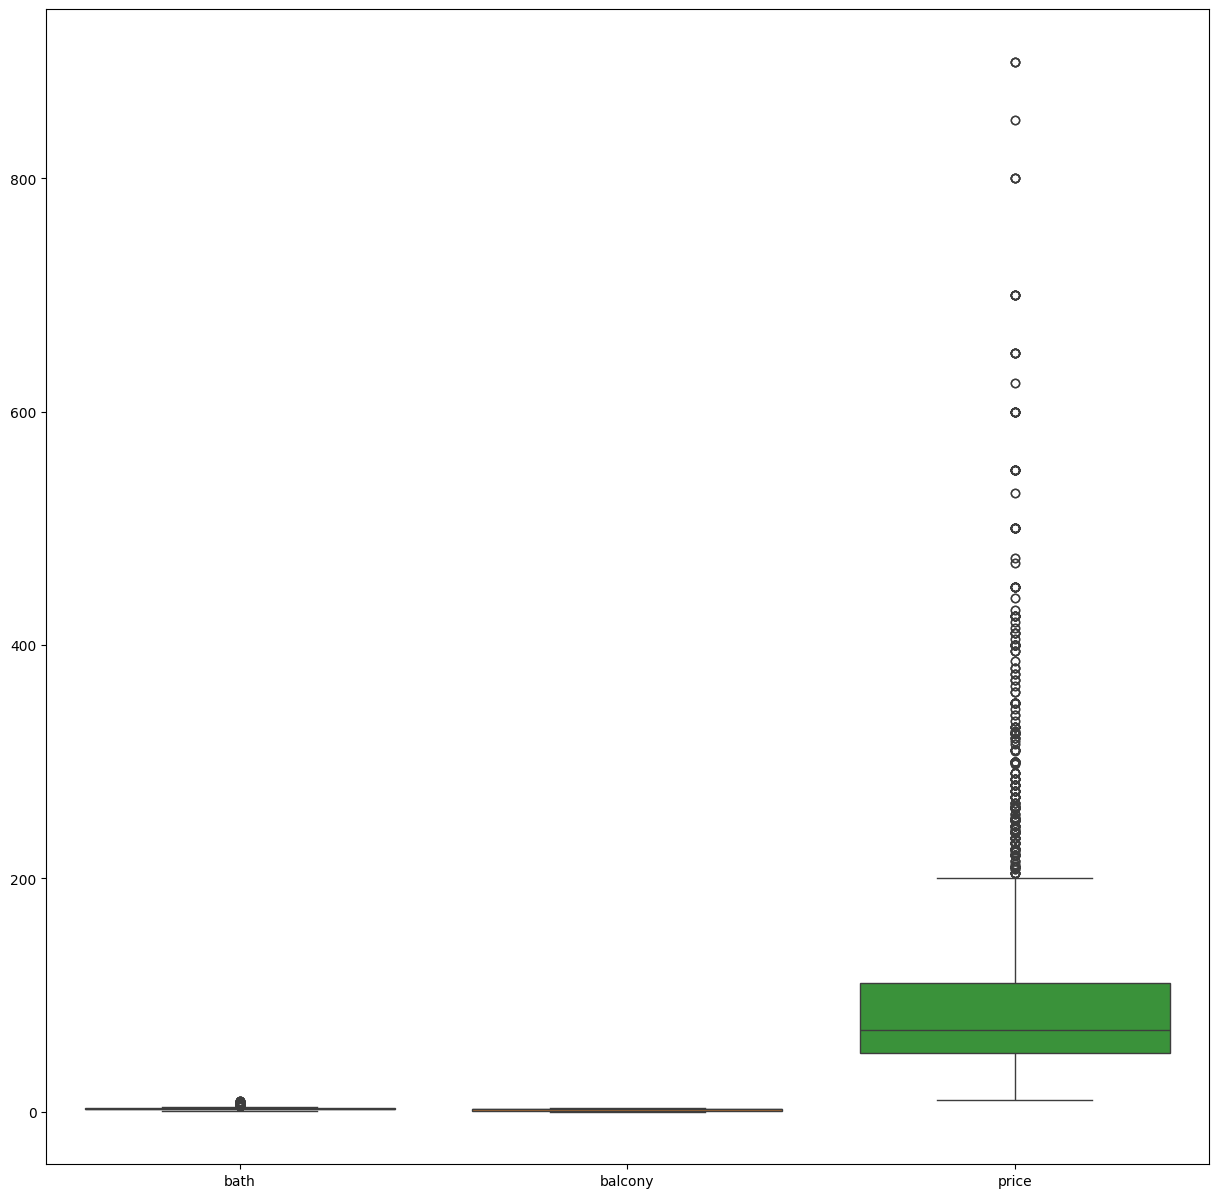

In [167]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=df1,ax=ax)

In [168]:
mean=df1['bath'].mean()
std=df1['bath'].std()
maxx=df1['bath'].max()
minn=df1['bath'].min()

In [169]:
high_value=mean+3*std
low_value=mean-3*std

In [170]:
outlier=df1[(df1['bath']>high_value) | (df1['bath']<low_value)]

In [171]:
outlier

,bath,balcony,price
45,9.0,1.612072,200.0
64,8.0,0.000000,140.0
79,6.0,3.000000,250.0
89,6.0,3.000000,160.0
140,8.0,1.612072,250.0
...,...,...,...
12878,6.0,2.000000,101.0
12892,6.0,2.000000,235.0
13198,8.0,0.000000,140.0
13208,6.0,1.000000,370.0


In [172]:
df1['bath']=np.where(df1['bath']>high_value,high_value,np.where(df1['bath']<low_value,low_value,df1['bath']))

C:\Users\R S computer\AppData\Local\Temp\ipykernel_10136\2906331325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bath']=np.where(df1['bath']>high_value,high_value,np.where(df1['bath']<low_value,low_value,df1['bath']))


In [173]:
df1

,bath,balcony,price
1,5.0,3.000000,120.0
2,2.0,3.000000,62.0
3,3.0,1.000000,95.0
4,2.0,1.000000,51.0
5,2.0,1.000000,38.0
...,...,...,...
13313,2.0,1.000000,57.0
13314,3.0,3.000000,112.0
13316,5.0,1.612072,400.0
13317,2.0,1.000000,60.0


In [174]:
q1=df1['balcony'].quantile(0.25)
q3=df1['balcony'].quantile(0.75)

In [175]:
iqr=q3-q1

In [176]:
minn=q1-1.5*iqr
maxx=q3+1.5*iqr

In [177]:
df1['balcony']=np.where(df1['balcony']>maxx,maxx,np.where(df1['balcony']<minn,minn,df1['balcony']))

C:\Users\R S computer\AppData\Local\Temp\ipykernel_10136\2534388105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['balcony']=np.where(df1['balcony']>maxx,maxx,np.where(df1['balcony']<minn,minn,df1['balcony']))


In [178]:
q1=df1['price'].quantile(0.25)
q3=df1['price'].quantile(0.75)

In [179]:
minn=q1-1.5*iqr
maxx=q3+1.5*iqr

In [180]:
df1['price']=np.where(df1['price']>maxx,maxx,np.where(df1['price']<minn,minn,df1['price']))

C:\Users\R S computer\AppData\Local\Temp\ipykernel_10136\1685715344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=np.where(df1['price']>maxx,maxx,np.where(df1['price']<minn,minn,df1['price']))


<Axes: >

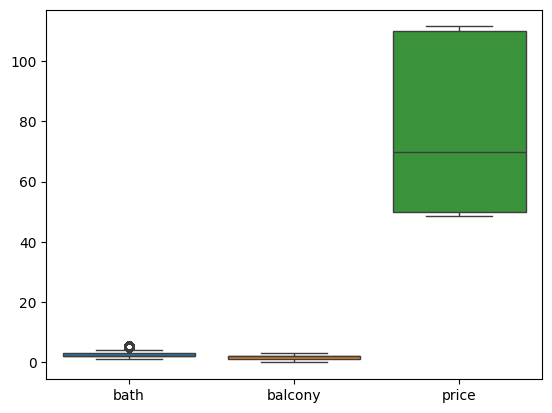

In [181]:
sns.boxplot(df1)

<Axes: >

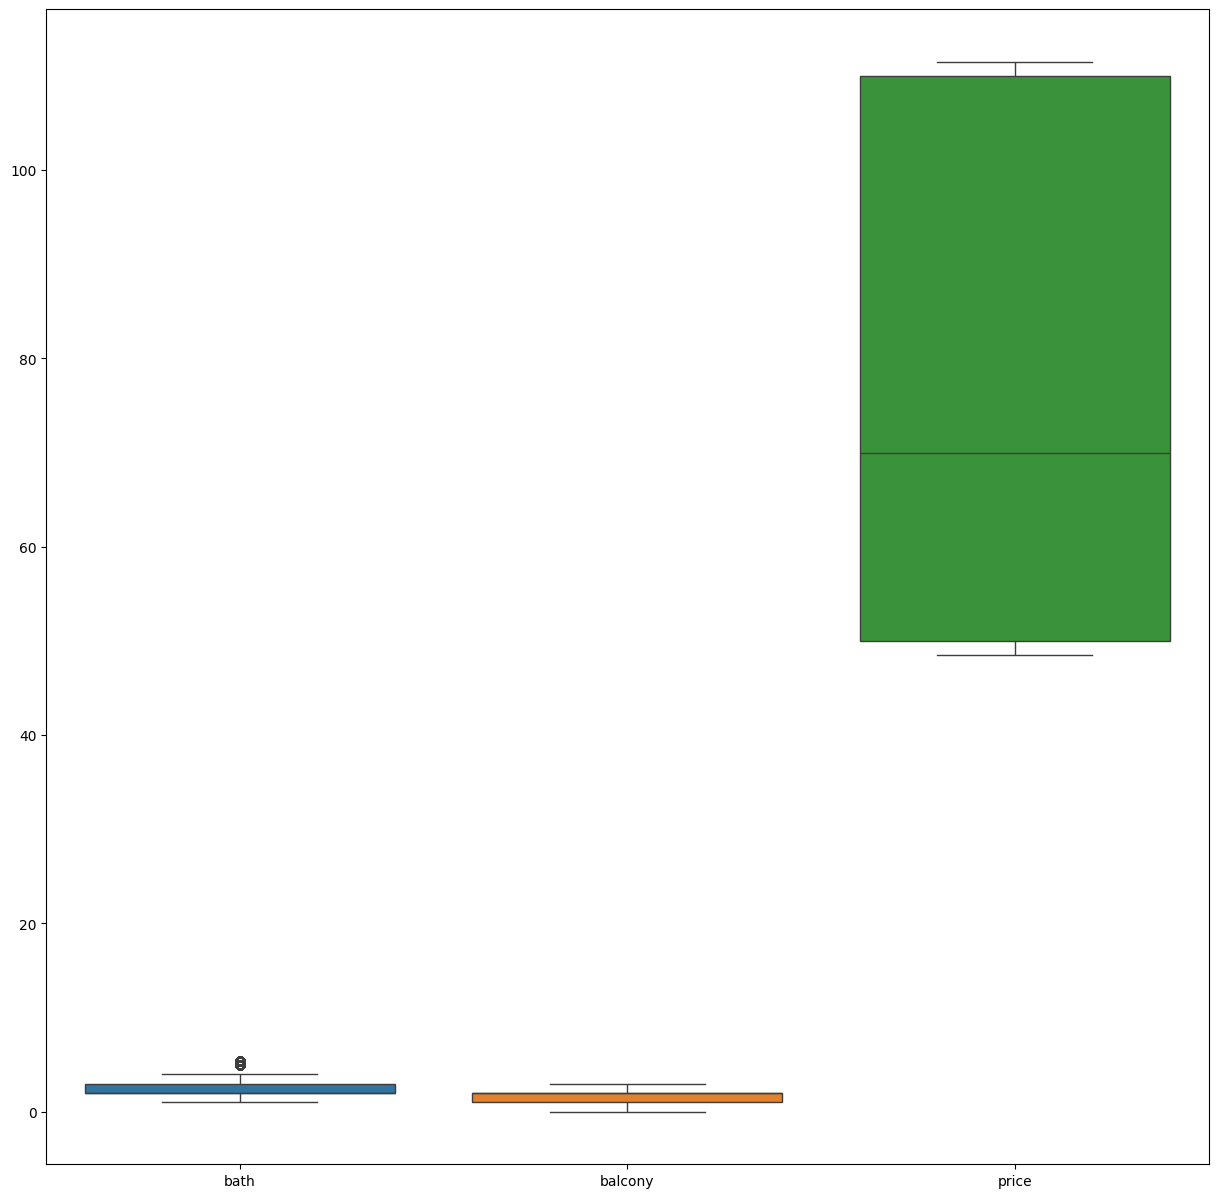

In [182]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=df1,ax=ax)

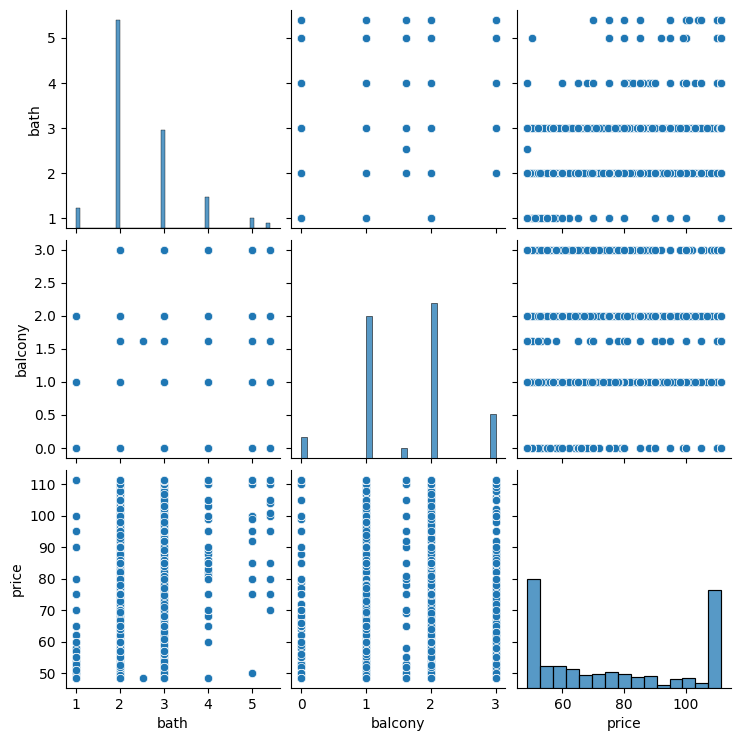

In [183]:
sns.pairplot(df1)

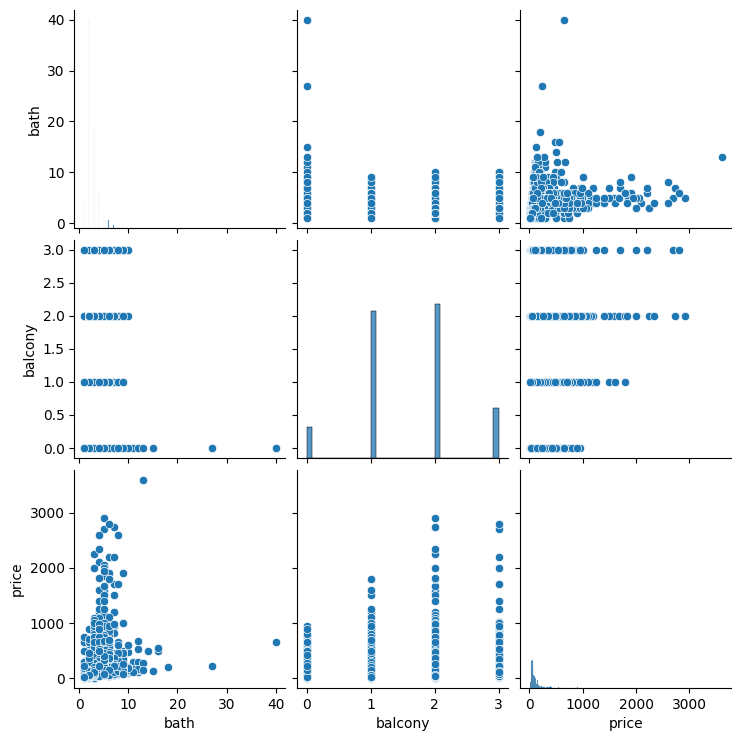

In [184]:
sns.pairplot(df)

In [185]:
df1.isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [186]:
df1

,bath,balcony,price
1,5.0,3.000000,111.5
2,2.0,3.000000,62.0
3,3.0,1.000000,95.0
4,2.0,1.000000,51.0
5,2.0,1.000000,48.5
...,...,...,...
13313,2.0,1.000000,57.0
13314,3.0,3.000000,111.5
13316,5.0,1.612072,111.5
13317,2.0,1.000000,60.0


In [187]:
x=df1.iloc[:,:-1]  #independant feature
y=df1.iloc[:,-1]  #depndant feature

In [188]:
x

,bath,balcony
1,5.0,3.000000
2,2.0,3.000000
3,3.0,1.000000
4,2.0,1.000000
5,2.0,1.000000
...,...,...
13313,2.0,1.000000
13314,3.0,3.000000
13316,5.0,1.612072
13317,2.0,1.000000


In [189]:
y

1        111.5
2         62.0
3         95.0
4         51.0
5         48.5
         ...  
13313     57.0
13314    111.5
13316    111.5
13317     60.0
13319     48.5
Name: price, Length: 10332, dtype: float64

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [191]:
x_train

,bath,balcony
8126,5.0,1.612072
94,2.0,3.000000
1526,2.0,2.000000
65,2.0,1.000000
1380,3.0,3.000000
...,...,...
7368,2.0,1.000000
6700,4.0,1.000000
6954,2.0,1.000000
1121,2.0,1.000000


In [192]:
x_test

,bath,balcony
8601,3.000000,0.0
11160,5.400982,3.0
999,4.000000,2.0
12504,4.000000,1.0
725,3.000000,2.0
...,...,...
9189,2.000000,2.0
10776,2.000000,1.0
2224,2.000000,2.0
4074,3.000000,1.0


In [193]:
y_train

8126    111.5
94       80.0
1526     48.5
65       62.0
1380     65.0
        ...  
7368     48.5
6700    111.5
6954     48.5
1121     48.5
9390    100.0
Name: price, Length: 7232, dtype: float64

In [194]:
y_test

8601     111.5
11160    111.5
999      111.5
12504     80.0
725       85.0
         ...  
9189      58.0
10776     48.5
2224      75.0
4074     111.5
3284      65.0
Name: price, Length: 3100, dtype: float64

In [195]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_norm=scaler.fit_transform(x_train)

In [196]:
x_train_norm

array([[ 2.78951334, -0.00402895],
       [-0.56750995,  1.82329207],
       [-0.56750995,  0.5067097 ],
       ...,
       [-0.56750995, -0.80987268],
       [-0.56750995, -0.80987268],
       [ 0.55149781, -0.80987268]])

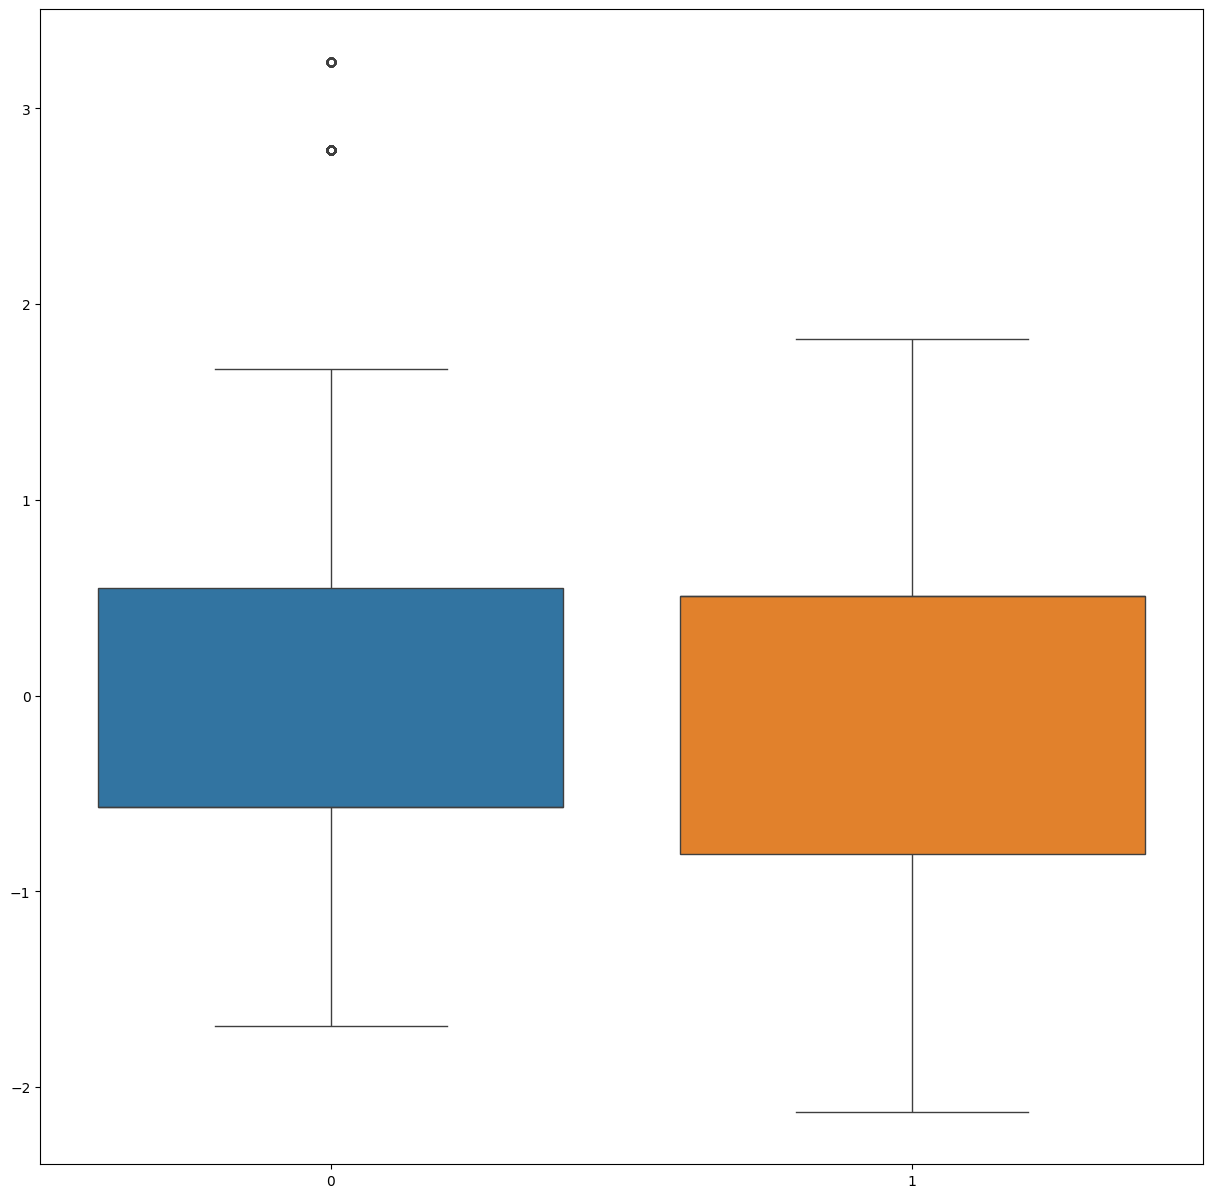

In [197]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=x_train_norm,ax=ax)
plt.savefig("boxplots.jpg")

In [198]:
x_test_norm=scaler.transform(x_test)

In [199]:
x_test_norm

array([[ 0.55149781, -2.12645505],
       [ 3.23821569,  1.82329207],
       [ 1.67050558,  0.5067097 ],
       ...,
       [-0.56750995,  0.5067097 ],
       [ 0.55149781, -0.80987268],
       [-0.56750995,  0.5067097 ]])

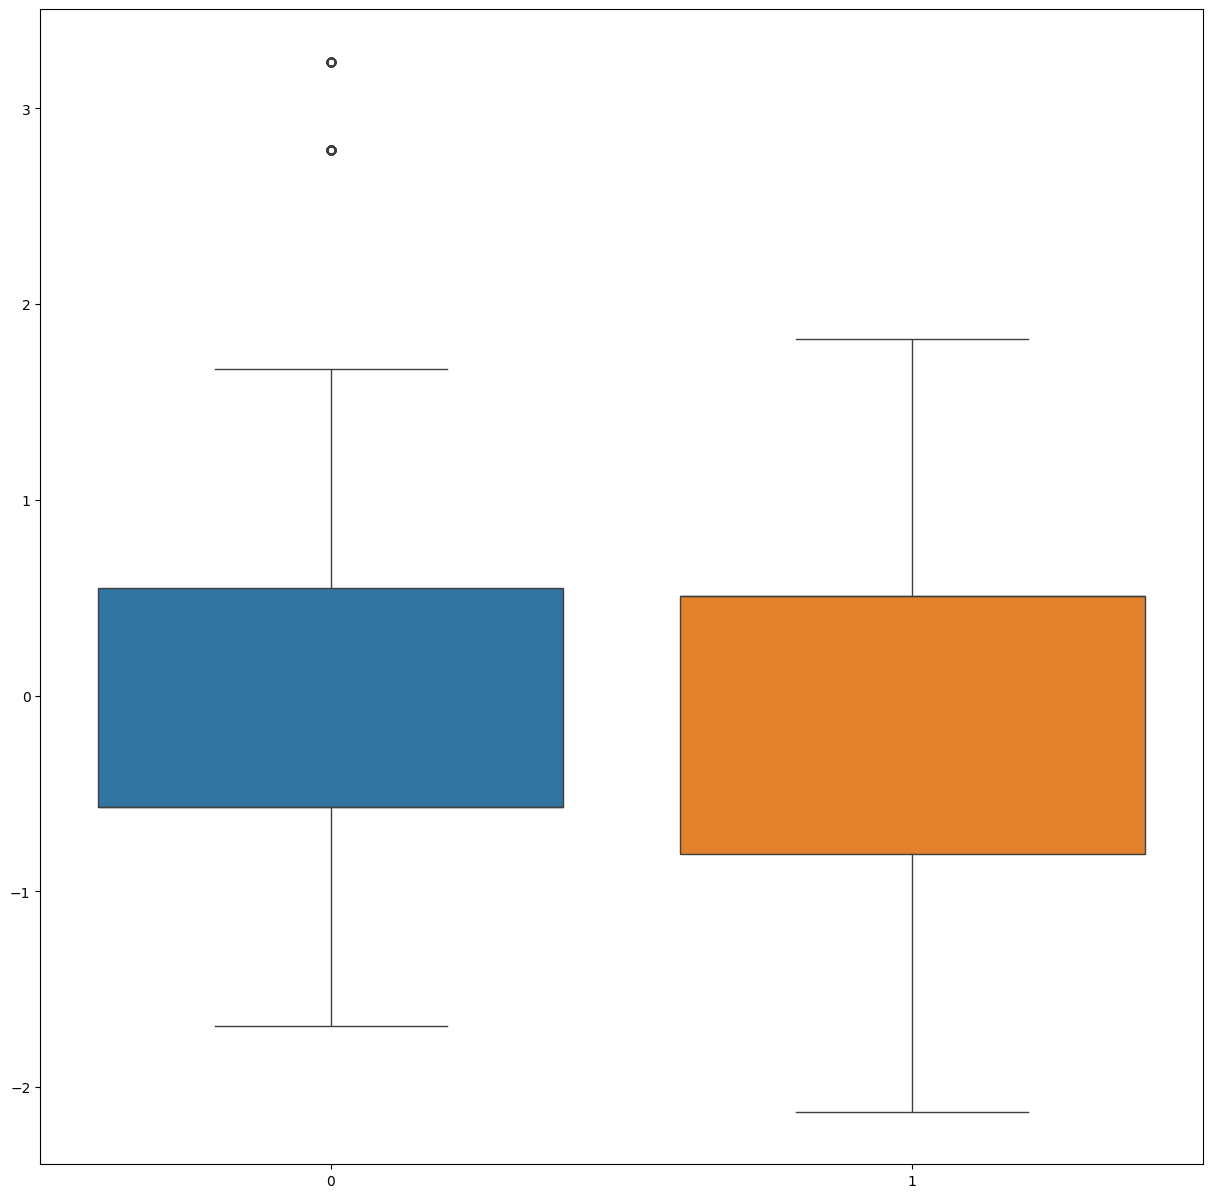

In [200]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=x_test_norm,ax=ax)
plt.savefig("boxplots1.jpg")

In [201]:
#model training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_norm,y_train)

LinearRegression()

In [202]:
print(regression.coef_)

[16.71424274  0.61448309]


In [203]:
print(regression.intercept_)

76.34325774336283


In [204]:
#model prediction
reg_pred=regression.predict(x_test_norm)
reg_pred

array([ 84.25445542, 131.5879629 , 104.57585802, ...,  67.1691232 ,
        85.06347301,  67.1691232 ])

In [205]:
residuals=y_test-reg_pred

In [206]:
residuals

8601     27.245545
11160   -20.087963
999       6.924142
12504   -23.766840
725      -0.872491
           ...    
9189     -9.169123
10776   -17.860106
2224      7.830877
4074     26.436527
3284     -2.169123
Name: price, Length: 3100, dtype: float64

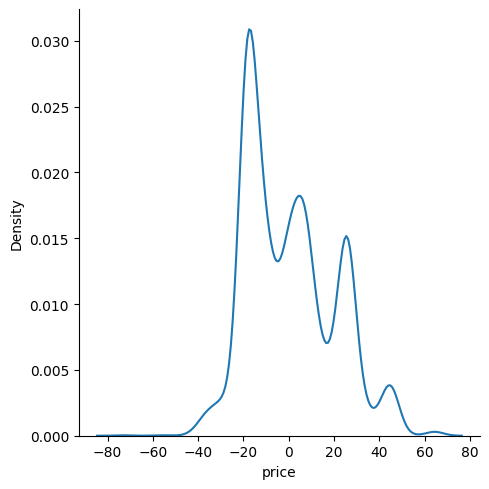

In [207]:
sns.displot(residuals,kind='kde')

In [208]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(r2_score(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

377.7751055065763
16.199647855042862
0.42769575207501964
19.43643757241991


In [209]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test_norm.shape[1]-1)

NameError: name 'score' is not defined

In [ ]:
x_test_norm.shape[1]

In [215]:
import pickle
pickle.dump(regression,open('modell.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [ ]:
model=pickle.load(open('modell.pkl','rb'))

In [ ]:
model.predict(x_test_norm)

In [210]:
new_data=np.array([[10,20]])
prediction = model.predict(new_data)
print('predicted Price',prediction)

predicted Price [255.77534689]


In [211]:
df.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [212]:
new_data = np.array([[200,100]])
scaled_data = scaler.transform(new_data)


prediction = model.predict(scaled_data)
print("Predicted price:", prediction)

Predicted price: [3849.71959532]


C:\Users\R S computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
